In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
np.random.seed(12345)
def makeline(r, theta, tmin=-1, tmax=1, n=50, noise=0.01):
    #     r=0.5
    #     theta = 30*np.pi/180
    r0 = r*np.array([np.cos(theta), np.sin(theta)])
    rt = np.array([np.cos(theta+np.pi/2), np.sin(theta+np.pi/2)])

    xy = np.array([r0 + rt*t for t in np.linspace(tmin, tmax, n)])
    xy = xy + np.random.randn(n, 2)*noise
    return xy
#uncomment if you wanna cheat
xy1 = makeline(0.5, 30*np.pi/180)
#plt.plot(xy1[:,0], xy1[:,1], '.')
xy2 = makeline(0.7, -20*np.pi/180)
#plt.plot(xy2[:,0], xy2[:,1], '.')
xy3 = makeline(0, -20*np.pi/180)
#plt.plot(xy3[:,0], xy3[:,1], '.')
xy4 = makeline(0, 30*np.pi/180)
#plt.plot(xy4[:,0], xy4[:,1], '.')

data = np.vstack([xy1, xy2, xy3, xy4])
np.random.shuffle(data)


# Hough Transform(Line Version)

Can you find equation of the lines in this pic(programatically)???

Can you find the corners?

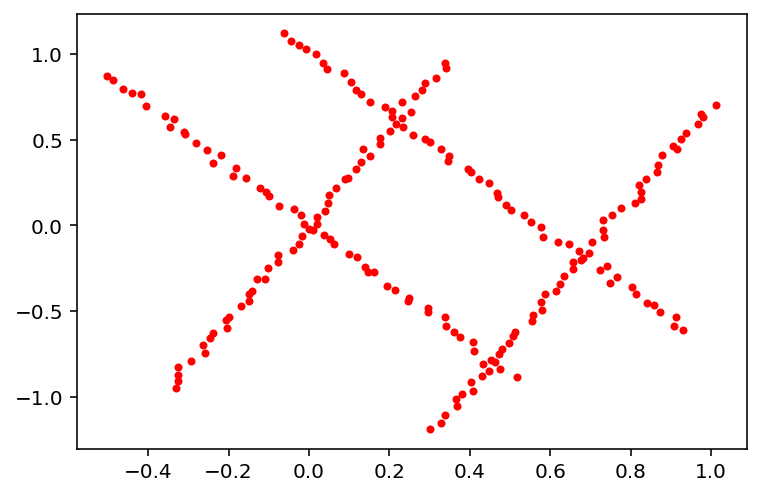

In [62]:
plt.plot(data[:, 0], data[:, 1], '.r')

## Convince your self that a line can be parametrize by $r$ and $\theta$. Write a parametric equation for the line.

## Draw a line with $r=2$, $\theta=30\deg$

## For a point (x,y) what is the set of $r$ and $\theta$ for line that passes through point x and y.

## Accumulate the $r$ and $\theta$ for all the data points and make a 2d histogram.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
71.0
71.0
54.0
60.0
56.0
[(-0.7066261445950848, 2.780309498426967), (-0.006984435836253633, 0.5026548245743669), (-0.006984435836253633, 2.780309498426967), (0.49626661783237935, 0.5026548245743669)]


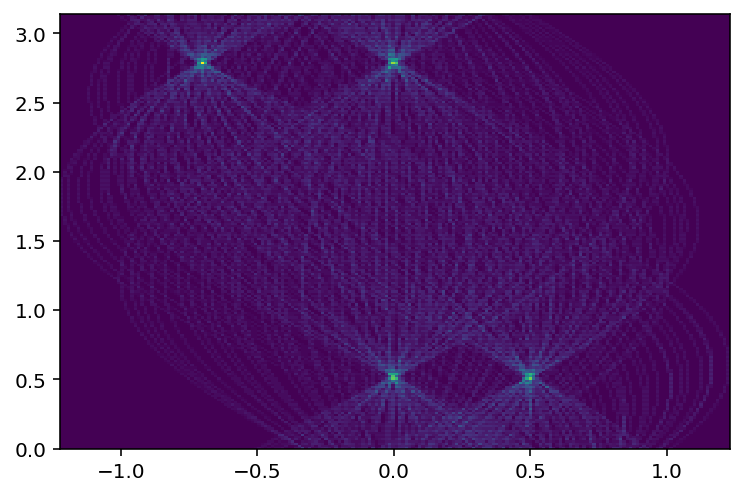

In [63]:
rt = []
for x, y in data:
    for theta in np.linspace(0, np.pi, 500):
        r = x*np.cos(theta) + y *np.sin(theta)
        rt.append([r, theta])
rt = np.array(rt)     
h, ex, ey, _ = plt.hist2d(rt[:,0], rt[:, 1], bins=200)
print(h)
print(np.max(h))

hough_peaks = []
for (i_row, i_col), x in np.ndenumerate(h):
    if x > 40:
        #print(np.max(h[i_row-3:i_row+3, i_col-3:i_col+3]))
        if x == np.max(h[i_row-3:i_row+3, i_col-3:i_col+3]):
            print(x)
            hough_peaks.append((ex[i_row], ey[i_col]))
print(hough_peaks)

## Find the peaks. Easiest way is to just find x>threshold and x is the max within certain window.

-0.7066261445950848 2.780309498426967
-0.006984435836253633 0.5026548245743669
-0.006984435836253633 2.780309498426967
0.49626661783237935 0.5026548245743669


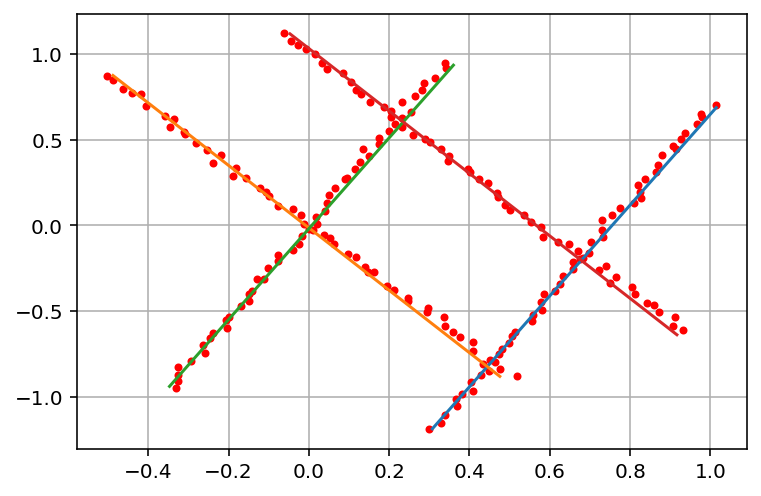

In [64]:
plt.plot(data[:, 0], data[:, 1], '.r')

def plot_line(r, theta):
    line  = makeline(r, theta, n=100, noise=0)
    plt.plot(line[:,0], line[:,1])

for r, theta in hough_peaks:
    print(r, theta)
    plot_line(r, theta)
plt.grid()

## Draw the lines given the peak parameter

# Hough Transform Circle Version.

We can use voting mechanism to actually find any decently-defined geometry

In [79]:
np.random.seed(999)
def make_circle(x, y, r, noise=0.01):
    thetas = np.linspace(0, 2*np.pi, 100)
    ret = [np.array([x, y]) + (r+noise*np.random.randn())*np.array([np.cos(t), np.sin(t)]) for t in thetas]
    return np.array(ret)

c1 = make_circle(1, 1.5, 0.3)
#plt.plot(c1[:,0], c1[:,1], '.')
c2 = make_circle(2, 1, 0.3)
#plt.plot(c2[:,0], c2[:,1], '.')
c3 = make_circle(1, 0.5, 0.1)
#plt.plot(c3[:,0], c3[:,1], '.')
#plt.gca().set_aspect(1)

data = np.vstack([c1, c2, c3])
np.random.shuffle(data)

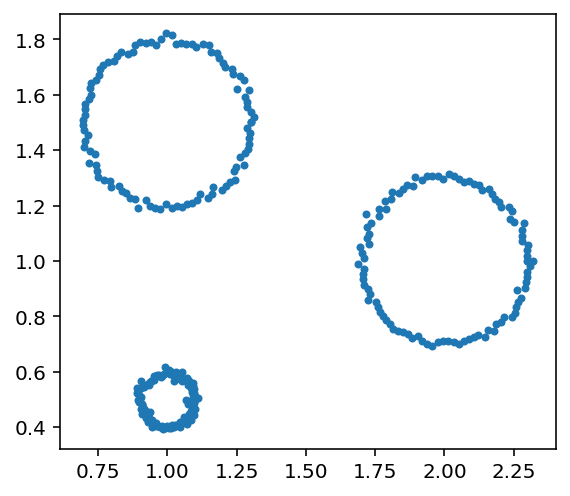

In [82]:
plt.plot(data[:,0], data[:, 1], '.')
plt.gca().set_aspect(1)

## How do we parametrize a circle?

## Given a point x,y what are the set of the parameter for the circle that pass through it.

## Accumulate

## Find Peak

## Draw the Circle... We can also use this to count the circle.